# Step 1: Import important libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import csv
import re # for regular expression
import string
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 

%matplotlib inline

In [2]:
# change the seeting of the cells
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


# Step 2: Read data file

In [3]:
# read csv file and save it in a data frame
data_df=pd.read_excel('C:\\Users\\lenovo\\Documents\\salmujaiwel\\1M_Covid19SaudiTweets.xlsx')

# Step 3: Explore the data

In [4]:
# how much data do I have?
len(data_df)

999782

In [5]:
# How about if I want to see part of the data?
data_df.head()

,UserName,Date,URL,Tweets,Author,Name,Country,UserID
0,lVfgtBolqQnYnG3,2020-04-30 23:59:49,https://twitter.com/user/show/status/1256010401092943873,توقف🤚هنا افضل المتاجر الالكترونيه🛒تسوق اونلاين لتجنب فيروس كورونا✋ كود خصم نسناس star4 ستايلي ST210 اتش اند ام A408 باث اند بودي D3iنمشي star18 نصر الاهلي الهلال الاتحاد جده توفير نون سنتر تخفيض عروض الهلال ستايلي باث اند بودي كوبون قطر مذركير الإمارات نسناس الرياض https://t.co/NyUQoujFwB,lVfgtBolqQnYnG3,دعاء,المملكة العربية السعودية⁦🇸🇦⁩,1229490000000000000
1,qlUm50zmMCJuy0h,2020-04-30 23:59:44,https://twitter.com/user/show/status/1256010376996622337,خصومات شهر ابريل 🙊 اشتري كل اللي انت عيزوا بخصومات كتيرة من نون🛒كود خصم نسناس star4 ستايلي ST210 اتش اند ام A408 كوبون باث اند بودي D3iنمشي star18نصر الاهلي الهلال الاتحاد جده الحب توفير سنتر عروض نسناس ستايلي الهلال نمشي باث اند بودي كورونا مذركير قطر الإمارات الرياض https://t.co/bAWlrEQ74U,qlUm50zmMCJuy0h,سحر,المملكة العربية السعودية⁦🇸🇦⁩,1230280000000000000
2,hagdaa4,2020-04-30 23:59:42,https://twitter.com/user/show/status/1256010369123917824,@ask_abh اتمنى ما يفتحونه لا هو ولاغيره ...حتى يختفي كورونا,hagdaa4,سبحان الله وبحمده سبحاان الله العظيم🌹🌹,KSA,2603608938
3,nane33441,2020-04-30 23:59:37,https://twitter.com/user/show/status/1256010350815830017,اللهم إن عبادك قد أعيتهم الحيل وضاقت بهم السبل وأظهروا عجزهم وبان ضعفهم وانكشف لهم من أقدارك ما لا حول لهم ولا قوة ... فاللهم لطفك بعبادك في مشارق الارض ومغاربها .#كورونا,nane33441,احمد الشمراني,المملكة العربية السعودية,786485000000000000
4,h_braveheart,2020-04-30 23:59:35,https://twitter.com/user/show/status/1256010341957414913,تطبيق #توكلنا- طلب استئذان او ترخيص.- عدد الحالات المصابة بـ #كورونا.- انذار عند الاقتراب من المناطق المعزولة.- الابلاغ عن الحالات المشتبه بها.,h_braveheart,‏Braveheart,المملكة العربية السعودية,948794437


In [6]:
# Remove nosiy tweets
noise=["كود خصم","خصومات","كوبون","تخفيضات","العقارات","لملاك","ملاك","عقارات","جلب الحبيب","فك السحر"]

In [7]:
def remove_noise(tweet):
    label="ok"
    for word in noise:
        if word in tweet:
            label="noise"
    return label

In [10]:
# apply the method
data_df["is Noise"] = data_df['Tweets'].apply(lambda x: remove_noise(str(x)))

In [11]:
data_df.head()

,UserName,Date,URL,Tweets,Author,Name,Country,UserID,is Noise
0,lVfgtBolqQnYnG3,2020-04-30 23:59:49,https://twitter.com/user/show/status/1256010401092943873,توقف🤚هنا افضل المتاجر الالكترونيه🛒تسوق اونلاين لتجنب فيروس كورونا✋ كود خصم نسناس star4 ستايلي ST210 اتش اند ام A408 باث اند بودي D3iنمشي star18 نصر الاهلي الهلال الاتحاد جده توفير نون سنتر تخفيض عروض الهلال ستايلي باث اند بودي كوبون قطر مذركير الإمارات نسناس الرياض https://t.co/NyUQoujFwB,lVfgtBolqQnYnG3,دعاء,المملكة العربية السعودية⁦🇸🇦⁩,1229490000000000000,noise
1,qlUm50zmMCJuy0h,2020-04-30 23:59:44,https://twitter.com/user/show/status/1256010376996622337,خصومات شهر ابريل 🙊 اشتري كل اللي انت عيزوا بخصومات كتيرة من نون🛒كود خصم نسناس star4 ستايلي ST210 اتش اند ام A408 كوبون باث اند بودي D3iنمشي star18نصر الاهلي الهلال الاتحاد جده الحب توفير سنتر عروض نسناس ستايلي الهلال نمشي باث اند بودي كورونا مذركير قطر الإمارات الرياض https://t.co/bAWlrEQ74U,qlUm50zmMCJuy0h,سحر,المملكة العربية السعودية⁦🇸🇦⁩,1230280000000000000,noise
2,hagdaa4,2020-04-30 23:59:42,https://twitter.com/user/show/status/1256010369123917824,@ask_abh اتمنى ما يفتحونه لا هو ولاغيره ...حتى يختفي كورونا,hagdaa4,سبحان الله وبحمده سبحاان الله العظيم🌹🌹,KSA,2603608938,ok
3,nane33441,2020-04-30 23:59:37,https://twitter.com/user/show/status/1256010350815830017,اللهم إن عبادك قد أعيتهم الحيل وضاقت بهم السبل وأظهروا عجزهم وبان ضعفهم وانكشف لهم من أقدارك ما لا حول لهم ولا قوة ... فاللهم لطفك بعبادك في مشارق الارض ومغاربها .#كورونا,nane33441,احمد الشمراني,المملكة العربية السعودية,786485000000000000,ok
4,h_braveheart,2020-04-30 23:59:35,https://twitter.com/user/show/status/1256010341957414913,تطبيق #توكلنا- طلب استئذان او ترخيص.- عدد الحالات المصابة بـ #كورونا.- انذار عند الاقتراب من المناطق المعزولة.- الابلاغ عن الحالات المشتبه بها.,h_braveheart,‏Braveheart,المملكة العربية السعودية,948794437,ok


In [12]:
# remove the noise
data_df=data_df[data_df["is Noise"]!="noise"]

In [13]:
data_df.head()

,UserName,Date,URL,Tweets,Author,Name,Country,UserID,is Noise
2,hagdaa4,2020-04-30 23:59:42,https://twitter.com/user/show/status/1256010369123917824,@ask_abh اتمنى ما يفتحونه لا هو ولاغيره ...حتى يختفي كورونا,hagdaa4,سبحان الله وبحمده سبحاان الله العظيم🌹🌹,KSA,2603608938,ok
3,nane33441,2020-04-30 23:59:37,https://twitter.com/user/show/status/1256010350815830017,اللهم إن عبادك قد أعيتهم الحيل وضاقت بهم السبل وأظهروا عجزهم وبان ضعفهم وانكشف لهم من أقدارك ما لا حول لهم ولا قوة ... فاللهم لطفك بعبادك في مشارق الارض ومغاربها .#كورونا,nane33441,احمد الشمراني,المملكة العربية السعودية,786485000000000000,ok
4,h_braveheart,2020-04-30 23:59:35,https://twitter.com/user/show/status/1256010341957414913,تطبيق #توكلنا- طلب استئذان او ترخيص.- عدد الحالات المصابة بـ #كورونا.- انذار عند الاقتراب من المناطق المعزولة.- الابلاغ عن الحالات المشتبه بها.,h_braveheart,‏Braveheart,المملكة العربية السعودية,948794437,ok
5,wn12313,2020-04-30 23:59:19,https://twitter.com/user/show/status/1256010274404028416,@Dan88Dn اخاف الحراره تجيني يختي كيف اقنعهم وقتها انو مو كورونا,wn12313,عَبث طفَله| 11 days left for my birthday🎈💛,المملكة العربية السعودية,1001190000000000000,ok
6,1mdlo,2020-04-30 23:59:07,https://twitter.com/user/show/status/1256010224810496001,@nafxil2 احنا دفعنا لعمال بداية السنة ويوم جاء كورونا قالوا اجازة من الحكومة واهربوا,1mdlo,دو,Kingdom of Saudi Arabia,1212290000000000000,ok


# Step 4: Apply the lexicon 

In [14]:
# read positive words list
pos_df=pd.read_csv("C:\\Users\\lenovo\\Documents\\salmujaiwel\\pos.csv")

In [15]:
pos_df[0:10]

,word
0,يوفقكو
1,يوغوتي
2,ينشاف
3,ينرد
4,ينحشر
5,يميني
6,يمنعش
7,يشب
8,يشافي
9,يسولف


In [16]:
pos_list=pos_df["word"].values.tolist()

In [17]:
def pos_sentiment(tweet):
    
    count=0
    # loop through the list of words and see if they are in the tweet text
    for word in pos_list:
        
        if word in tweet:
            count+=1
    
    return count

In [19]:
#apply the method to the data
data_df["pos_count"] = data_df['Tweets'].apply(lambda x: pos_sentiment(str(x)))

In [20]:
data_df.head()

,UserName,Date,URL,Tweets,Author,Name,Country,UserID,is Noise,pos_count
2,hagdaa4,2020-04-30 23:59:42,https://twitter.com/user/show/status/1256010369123917824,@ask_abh اتمنى ما يفتحونه لا هو ولاغيره ...حتى يختفي كورونا,hagdaa4,سبحان الله وبحمده سبحاان الله العظيم🌹🌹,KSA,2603608938,ok,1
3,nane33441,2020-04-30 23:59:37,https://twitter.com/user/show/status/1256010350815830017,اللهم إن عبادك قد أعيتهم الحيل وضاقت بهم السبل وأظهروا عجزهم وبان ضعفهم وانكشف لهم من أقدارك ما لا حول لهم ولا قوة ... فاللهم لطفك بعبادك في مشارق الارض ومغاربها .#كورونا,nane33441,احمد الشمراني,المملكة العربية السعودية,786485000000000000,ok,1
4,h_braveheart,2020-04-30 23:59:35,https://twitter.com/user/show/status/1256010341957414913,تطبيق #توكلنا- طلب استئذان او ترخيص.- عدد الحالات المصابة بـ #كورونا.- انذار عند الاقتراب من المناطق المعزولة.- الابلاغ عن الحالات المشتبه بها.,h_braveheart,‏Braveheart,المملكة العربية السعودية,948794437,ok,3
5,wn12313,2020-04-30 23:59:19,https://twitter.com/user/show/status/1256010274404028416,@Dan88Dn اخاف الحراره تجيني يختي كيف اقنعهم وقتها انو مو كورونا,wn12313,عَبث طفَله| 11 days left for my birthday🎈💛,المملكة العربية السعودية,1001190000000000000,ok,1
6,1mdlo,2020-04-30 23:59:07,https://twitter.com/user/show/status/1256010224810496001,@nafxil2 احنا دفعنا لعمال بداية السنة ويوم جاء كورونا قالوا اجازة من الحكومة واهربوا,1mdlo,دو,Kingdom of Saudi Arabia,1212290000000000000,ok,1


In [21]:
# read negative words list
neg_df=pd.read_csv("C:\\Users\\lenovo\\Documents\\salmujaiwel\\neg.csv")

In [22]:
neg_list=neg_df["word"].values.tolist()

In [23]:
def neg_sentiment(tweet):
    
    count=0
     # loop through the list of words and see if they are in the tweet text
    for word in neg_list:
        if word in tweet:
            count+=1
               
    return count

In [24]:
#apply the method to the data
data_df["neg_count"] = data_df['Tweets'].apply(lambda x: neg_sentiment(str(x)))

In [25]:
data_df.head(1)

,UserName,Date,URL,Tweets,Author,Name,Country,UserID,is Noise,pos_count,neg_count
2,hagdaa4,2020-04-30 23:59:42,https://twitter.com/user/show/status/1256010369123917824,@ask_abh اتمنى ما يفتحونه لا هو ولاغيره ...حتى يختفي كورونا,hagdaa4,سبحان الله وبحمده سبحاان الله العظيم🌹🌹,KSA,2603608938,ok,1,1


Number of positive and negative words in each tweet. 

In [26]:
def tweet_sentiment(tweet):
    
    pos_sent=pos_sentiment(tweet)
    
    neg_sent=neg_sentiment(tweet)
    
    if pos_sent > neg_sent:
        label = "Positive"
    
    elif pos_sent < neg_sent:
        label = "Negative"
    else:
        label = "Neutral" 
   
   
    return label

In [28]:
data_df["sentiment"] = data_df['Tweets'].apply(lambda x: tweet_sentiment(str(x)))

In [29]:
data_df.head()

,UserName,Date,URL,Tweets,Author,Name,Country,UserID,is Noise,pos_count,neg_count,sentiment
2,hagdaa4,2020-04-30 23:59:42,https://twitter.com/user/show/status/1256010369123917824,@ask_abh اتمنى ما يفتحونه لا هو ولاغيره ...حتى يختفي كورونا,hagdaa4,سبحان الله وبحمده سبحاان الله العظيم🌹🌹,KSA,2603608938,ok,1,1,Neutral
3,nane33441,2020-04-30 23:59:37,https://twitter.com/user/show/status/1256010350815830017,اللهم إن عبادك قد أعيتهم الحيل وضاقت بهم السبل وأظهروا عجزهم وبان ضعفهم وانكشف لهم من أقدارك ما لا حول لهم ولا قوة ... فاللهم لطفك بعبادك في مشارق الارض ومغاربها .#كورونا,nane33441,احمد الشمراني,المملكة العربية السعودية,786485000000000000,ok,1,2,Negative
4,h_braveheart,2020-04-30 23:59:35,https://twitter.com/user/show/status/1256010341957414913,تطبيق #توكلنا- طلب استئذان او ترخيص.- عدد الحالات المصابة بـ #كورونا.- انذار عند الاقتراب من المناطق المعزولة.- الابلاغ عن الحالات المشتبه بها.,h_braveheart,‏Braveheart,المملكة العربية السعودية,948794437,ok,3,4,Negative
5,wn12313,2020-04-30 23:59:19,https://twitter.com/user/show/status/1256010274404028416,@Dan88Dn اخاف الحراره تجيني يختي كيف اقنعهم وقتها انو مو كورونا,wn12313,عَبث طفَله| 11 days left for my birthday🎈💛,المملكة العربية السعودية,1001190000000000000,ok,1,0,Positive
6,1mdlo,2020-04-30 23:59:07,https://twitter.com/user/show/status/1256010224810496001,@nafxil2 احنا دفعنا لعمال بداية السنة ويوم جاء كورونا قالوا اجازة من الحكومة واهربوا,1mdlo,دو,Kingdom of Saudi Arabia,1212290000000000000,ok,1,1,Neutral


# Step 5: Explore the results

In [30]:
# Q: How many tweets have positive sentiment and how many have negative sentiment
tweets_by_sentiment = data_df['sentiment'].value_counts()

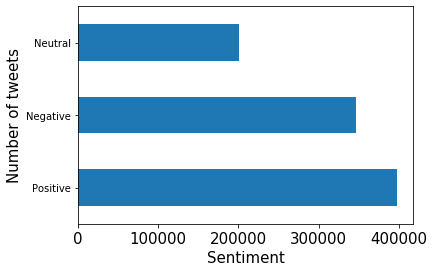

In [31]:
# visualize the results 
fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('Sentiment', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)

tweets_by_sentiment.plot(ax=ax, kind='barh')

# Step 6: Clean the text

In [32]:
# remove punctuations علامات الترقيم  

arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [33]:
def normalize_arabic(text):
    
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    text = re.sub("ؤ", "و", text)

    return text

In [34]:
#start processing the tweet 
def processPost(tweet):

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
    #check if the word in the dictionary list (it have two letters as part of the word)
    tweet= normalize_arabic(tweet)
    
    #remove numbers
    tweet = ''.join(i for i in tweet if not i.isdigit())
    
    #remove english letters
    tweet= re.sub(r'[a-z]+'," ", tweet)
    tweet= re.sub(r'[A-Z]+'," ", tweet)
    
    return tweet

In [36]:
data_df["clean text"] = data_df['Tweets'].apply(lambda x: processPost(str(x)))

In [37]:
data_df.head()

,UserName,Date,URL,Tweets,Author,Name,Country,UserID,is Noise,pos_count,neg_count,sentiment,clean text
2,hagdaa4,2020-04-30 23:59:42,https://twitter.com/user/show/status/1256010369123917824,@ask_abh اتمنى ما يفتحونه لا هو ولاغيره ...حتى يختفي كورونا,hagdaa4,سبحان الله وبحمده سبحاان الله العظيم🌹🌹,KSA,2603608938,ok,1,1,Neutral,اتمني ما يفتحونه لا هو ولاغيره حتي يختفي كورونا
3,nane33441,2020-04-30 23:59:37,https://twitter.com/user/show/status/1256010350815830017,اللهم إن عبادك قد أعيتهم الحيل وضاقت بهم السبل وأظهروا عجزهم وبان ضعفهم وانكشف لهم من أقدارك ما لا حول لهم ولا قوة ... فاللهم لطفك بعبادك في مشارق الارض ومغاربها .#كورونا,nane33441,احمد الشمراني,المملكة العربية السعودية,786485000000000000,ok,1,2,Negative,اللهم ان عبادك قد اعيتهم الحيل وضاقت بهم السبل واظهروا عجزهم وبان ضعفهم وانكشف لهم من اقدارك ما لا حول لهم ولا قوه فاللهم لطفك بعبادك في مشارق الارض ومغاربها كورونا
4,h_braveheart,2020-04-30 23:59:35,https://twitter.com/user/show/status/1256010341957414913,تطبيق #توكلنا- طلب استئذان او ترخيص.- عدد الحالات المصابة بـ #كورونا.- انذار عند الاقتراب من المناطق المعزولة.- الابلاغ عن الحالات المشتبه بها.,h_braveheart,‏Braveheart,المملكة العربية السعودية,948794437,ok,3,4,Negative,تطبيق توكلنا طلب استئذان او ترخيص عدد الحالات المصابه ب كورونا انذار عند الاقتراب من المناطق المعزوله الابلاغ عن الحالات المشتبه بها
5,wn12313,2020-04-30 23:59:19,https://twitter.com/user/show/status/1256010274404028416,@Dan88Dn اخاف الحراره تجيني يختي كيف اقنعهم وقتها انو مو كورونا,wn12313,عَبث طفَله| 11 days left for my birthday🎈💛,المملكة العربية السعودية,1001190000000000000,ok,1,0,Positive,اخاف الحراره تجيني يختي كيف اقنعهم وقتها انو مو كورونا
6,1mdlo,2020-04-30 23:59:07,https://twitter.com/user/show/status/1256010224810496001,@nafxil2 احنا دفعنا لعمال بداية السنة ويوم جاء كورونا قالوا اجازة من الحكومة واهربوا,1mdlo,دو,Kingdom of Saudi Arabia,1212290000000000000,ok,1,1,Neutral,احنا دفعنا لعمال بدايه السنه ويوم جاء كورونا قالوا اجازه من الحكومه واهربوا


# Step 7: Convert text to tokens

In [38]:
tokenizer = RegexpTokenizer(r'\w+')
data_df["tokens"] = data_df["clean text"].apply(tokenizer.tokenize)

In [39]:
data_df.head()

,UserName,Date,URL,Tweets,Author,Name,Country,UserID,is Noise,pos_count,neg_count,sentiment,clean text,tokens
2,hagdaa4,2020-04-30 23:59:42,https://twitter.com/user/show/status/1256010369123917824,@ask_abh اتمنى ما يفتحونه لا هو ولاغيره ...حتى يختفي كورونا,hagdaa4,سبحان الله وبحمده سبحاان الله العظيم🌹🌹,KSA,2603608938,ok,1,1,Neutral,اتمني ما يفتحونه لا هو ولاغيره حتي يختفي كورونا,"[اتمني, ما, يفتحونه, لا, هو, ولاغيره, حتي, يختفي, كورونا]"
3,nane33441,2020-04-30 23:59:37,https://twitter.com/user/show/status/1256010350815830017,اللهم إن عبادك قد أعيتهم الحيل وضاقت بهم السبل وأظهروا عجزهم وبان ضعفهم وانكشف لهم من أقدارك ما لا حول لهم ولا قوة ... فاللهم لطفك بعبادك في مشارق الارض ومغاربها .#كورونا,nane33441,احمد الشمراني,المملكة العربية السعودية,786485000000000000,ok,1,2,Negative,اللهم ان عبادك قد اعيتهم الحيل وضاقت بهم السبل واظهروا عجزهم وبان ضعفهم وانكشف لهم من اقدارك ما لا حول لهم ولا قوه فاللهم لطفك بعبادك في مشارق الارض ومغاربها كورونا,"[اللهم, ان, عبادك, قد, اعيتهم, الحيل, وضاقت, بهم, السبل, واظهروا, عجزهم, وبان, ضعفهم, وانكشف, لهم, من, اقدارك, ما, لا, حول, لهم, ولا, قوه, فاللهم, لطفك, بعبادك, في, مشارق, الارض, ومغاربها, كورونا]"
4,h_braveheart,2020-04-30 23:59:35,https://twitter.com/user/show/status/1256010341957414913,تطبيق #توكلنا- طلب استئذان او ترخيص.- عدد الحالات المصابة بـ #كورونا.- انذار عند الاقتراب من المناطق المعزولة.- الابلاغ عن الحالات المشتبه بها.,h_braveheart,‏Braveheart,المملكة العربية السعودية,948794437,ok,3,4,Negative,تطبيق توكلنا طلب استئذان او ترخيص عدد الحالات المصابه ب كورونا انذار عند الاقتراب من المناطق المعزوله الابلاغ عن الحالات المشتبه بها,"[تطبيق, توكلنا, طلب, استئذان, او, ترخيص, عدد, الحالات, المصابه, ب, كورونا, انذار, عند, الاقتراب, من, المناطق, المعزوله, الابلاغ, عن, الحالات, المشتبه, بها]"
5,wn12313,2020-04-30 23:59:19,https://twitter.com/user/show/status/1256010274404028416,@Dan88Dn اخاف الحراره تجيني يختي كيف اقنعهم وقتها انو مو كورونا,wn12313,عَبث طفَله| 11 days left for my birthday🎈💛,المملكة العربية السعودية,1001190000000000000,ok,1,0,Positive,اخاف الحراره تجيني يختي كيف اقنعهم وقتها انو مو كورونا,"[اخاف, الحراره, تجيني, يختي, كيف, اقنعهم, وقتها, انو, مو, كورونا]"
6,1mdlo,2020-04-30 23:59:07,https://twitter.com/user/show/status/1256010224810496001,@nafxil2 احنا دفعنا لعمال بداية السنة ويوم جاء كورونا قالوا اجازة من الحكومة واهربوا,1mdlo,دو,Kingdom of Saudi Arabia,1212290000000000000,ok,1,1,Neutral,احنا دفعنا لعمال بدايه السنه ويوم جاء كورونا قالوا اجازه من الحكومه واهربوا,"[احنا, دفعنا, لعمال, بدايه, السنه, ويوم, جاء, كورونا, قالوا, اجازه, من, الحكومه, واهربوا]"


In [40]:
all_words = [word for tokens in data_df["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data_df["tokens"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

19138158 words total, with a vocabulary size of 542291
Max sentence length is 1808


In [41]:
# count the number of words
word_counter = Counter(all_words)

In [42]:
# show the most common words
word_counter.most_common(30)

[('كورونا', 632847),
 ('من', 532711),
 ('في', 459510),
 ('علي', 206320),
 ('فيروس', 184919),
 ('الله', 142855),
 ('السعوديه', 134350),
 ('و', 123836),
 ('ان', 113886),
 ('عن', 104595),
 ('فيروسكورونا', 95827),
 ('الي', 86577),
 ('ا', 83085),
 ('مع', 72276),
 ('الصحه', 68057),
 ('حاله', 63960),
 ('لا', 63817),
 ('للوقايه', 58868),
 ('ما', 57734),
 ('كل', 57548),
 ('انتشار', 56162),
 ('بعد', 54241),
 ('هذا', 52960),
 ('ب', 51420),
 ('المملكه', 49466),
 ('او', 49424),
 ('الرياضيه', 49172),
 ('عدوي', 48653),
 ('الرياض', 47847),
 ('قناه', 47768)]

In [43]:

for_df=data_df[data_df["sentiment"]=="Positive"]

In [44]:
For_words = [ word for tokens in for_df["tokens"] for word in tokens]

In [45]:
for_word_counter = Counter(For_words)

In [46]:
for_word_counter.most_common(10)

[('كورونا', 261915),
 ('من', 244118),
 ('في', 213723),
 ('علي', 102254),
 ('الله', 80137),
 ('فيروس', 63134),
 ('ان', 61206),
 ('السعوديه', 60672),
 ('و', 60024),
 ('عن', 51695)]

In [47]:
against_df=data_df[data_df["sentiment"]=="Negative"]

In [48]:
against_words = [ word for tokens in against_df["tokens"] for word in tokens]

In [49]:
against_word_counter = Counter(against_words)

In [50]:
against_word_counter.most_common(10)

[('كورونا', 229537),
 ('من', 190283),
 ('في', 177733),
 ('فيروس', 93243),
 ('علي', 76827),
 ('حاله', 48124),
 ('السعوديه', 47999),
 ('فيروسكورونا', 47014),
 ('و', 44639),
 ('الله', 39061)]

# Step 6: ML Classification

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics  import confusion_matrix, classification_report
from sklearn import metrics

In [52]:
# remove the "Neutral" class
data_df=data_df[data_df['sentiment'] != "Neutral"]

In [53]:
# change values to numeric
data_df['sentiment'] = data_df['sentiment'].map({'Positive': 1, 'Negative': 0}) 

In [54]:
# idneitfy the data and the labels
data= data_df['clean text']
target= data_df['sentiment']

In [55]:
# Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
tf_vec = TfidfVectorizer()
X = tf_vec.fit_transform(data)
X.shape

(744021, 489018)

In [56]:
# Training Phase
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.50, random_state=0)

In [57]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(372010, 489018) (372011, 489018) (372010,) (372011,)


## Support Vector Machine Classifier

In [ ]:
# create the classifer and fit the training data and lables
classifier_svm = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train,y_train)

print("SVM accuracy: %.2f"%classifier_svm.score(X_test, y_test))

In [ ]:
#do a 10 fold cross-validation 
results_svm = cross_val_score(classifier_svm, X,target, cv=10)
print("\n10-fold cross-validation:")
print(results_svm)

print("The average accuracy of the SVM classifier is : %.2f" % np.mean(results_svm))

In [ ]:
print("\nConfusion matrix of the SVM classifier:")
predicted_svm = classifier_svm.predict(X_test)
print(confusion_matrix(y_test,predicted_svm))

In [ ]:
print("\nClassification_report of SVM classifier:")
print(classification_report(y_test,predicted_svm))
print("----------------------------------------------------------------------------")

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier_svm.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
# polt the AUC
plt.title('Receiver Operating Characteristic SVM classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
def most_informative_feature(vectorizer, classifier, top_features=20):
    
    feature_names = vectorizer.get_feature_names()
    svm_coef = classifier.coef_.toarray() 
    
    top_positive_coefficients = sorted(zip(svm_coef[0], feature_names))[-top_features:]
    top_negative_coefficients = sorted(zip(svm_coef[0], feature_names))[:top_features]
    
    print ("Top Positive Coefficients")
    print ("==========================")
    for coef, feat in top_positive_coefficients:
        print (feat, coef)
        
    print ("")
    print ("Top Negative Coefficients")
    print ("==========================")
    for coef, feat in top_negative_coefficients:
        print (feat, coef)       


In [ ]:
# show the most informatics features for the svm classifier 
most_informative_feature(tf_vec,classifier_svm)